In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import h3

from pathlib import Path

# Обзор данных

In [3]:
data_root = Path('data/')
df = pd.read_csv(data_root/ 'train.csv')
test = pd.read_csv(data_root/'test.csv')
df


,geo_h3_10,lat_10,lon_10,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,...,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,dt,pred
0,8a1181b2ba2ffff,55.503834,37.576614,634.24390,817.54675,759.8750,684.31370,127483.02,58045.82,6079.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,452.30276,20210401,5943.575327
1,8a1181b66ad7fff,55.577595,37.597054,353.37833,409.18585,613.1053,416.73734,31804.05,31507.31,19619.37,...,NaN,NaN,624.62840,NaN,NaN,NaN,NaN,624.62840,20210401,4784.871945
2,8a1181b68d9ffff,55.615330,37.682785,570.00000,593.75000,704.2105,617.27270,13110.00,14250.00,13380.00,...,NaN,1174.89700,NaN,NaN,NaN,NaN,NaN,1174.89700,20210401,4615.358099
3,8a1181b6c6a7fff,55.619507,37.671840,935.88890,1520.92590,1482.6666,1253.83340,25269.00,41065.00,8896.00,...,NaN,NaN,NaN,NaN,NaN,1849.403,NaN,1849.40300,20210401,5513.642395
4,8a11aa01820ffff,55.981903,37.249943,1365.97570,1044.59690,1398.0240,1236.73950,382473.22,269506.00,116036.00,...,NaN,NaN,449.06183,NaN,NaN,NaN,NaN,390.13397,20210401,4895.743837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126043,8a11aa7aba5ffff,55.771763,37.637170,2945.96480,2223.68700,3683.3843,2920.21830,427164.90,364684.70,534090.75,...,NaN,1265.90210,3292.93120,NaN,NaN,NaN,10310.282,1402.60910,20210201,6694.676943
126044,8a11aa7b17a7fff,55.683357,37.552513,568.30255,542.52420,911.7054,736.12270,110819.00,145939.00,439442.00,...,NaN,370.58954,NaN,2238.6643,NaN,NaN,NaN,316.59720,20210201,5962.962424
126045,8a11aa7b2b17fff,55.658750,37.531060,6384.90700,7875.83200,8827.2110,7567.58200,893887.00,1433401.40,794449.00,...,NaN,NaN,2224.20700,NaN,NaN,NaN,NaN,346.92245,20210201,5134.592897
126046,8a11aa7b56c7fff,55.687786,37.527040,1718.75000,3530.00000,3111.8750,2907.05880,13750.00,35300.00,49790.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3744.96920,20210201,5427.317144


In [4]:
df.describe()

,lat_10,lon_10,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,dt,pred
count,126048.000000,126048.000000,124718.000000,124379.000000,1.205960e+05,126048.000000,1.247180e+05,1.243790e+05,1.205960e+05,1.260480e+05,...,59706.000000,21171.000000,40192.000000,18694.000000,11335.000000,35818.000000,11642.000000,125551.000000,1.260480e+05,126048.000000
mean,55.735531,37.582860,1979.797055,2459.473936,3.654012e+03,2742.898341,5.308342e+05,6.778931e+05,9.502843e+05,2.186601e+06,...,1103.145685,1598.716379,1568.861797,4866.771383,4348.206985,3511.045042,3773.598722,1922.974113,2.021046e+07,5737.172157
std,0.101444,0.143881,5057.237348,6543.053936,1.212766e+04,8464.263966,2.381616e+06,3.166201e+06,7.066632e+06,1.238963e+07,...,3587.419662,3958.055175,3741.022254,8355.619097,8256.446110,6771.146737,6914.495716,4731.663301,1.684984e+02,600.746883
min,55.212296,36.824800,4.000000,1.000000,1.000000e+00,4.000000,4.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,2.021020e+07,3591.191208
25%,55.672129,37.501780,397.585330,490.254535,5.710907e+02,474.625893,3.076325e+04,3.074885e+04,1.780000e+04,8.810750e+04,...,104.174142,236.657235,175.294587,1026.632325,575.089550,506.269462,454.413783,275.428335,2.021030e+07,5341.936877
50%,55.741098,37.589979,679.002475,871.580750,1.144696e+03,872.501525,1.213751e+05,1.299303e+05,8.842960e+04,3.679502e+05,...,257.550190,562.543460,482.475130,2395.702050,1563.829600,1344.887900,1546.278350,621.134460,2.021050e+07,5792.180935
75%,55.802701,37.672122,1669.931550,2054.446500,2.791705e+03,2243.011625,3.996322e+05,4.455986e+05,3.869519e+05,1.281481e+06,...,761.409950,1428.751850,1427.081425,5252.605025,4581.995500,3621.501000,4217.388925,1634.650750,2.021060e+07,6141.340279
max,56.015930,37.960050,348183.660000,353292.530000,1.237396e+06,859840.940000,1.613739e+08,1.806512e+08,5.962533e+08,8.326784e+08,...,119477.630000,110818.984000,126637.150000,129537.734000,122557.700000,128345.516000,109265.234000,126850.664000,2.021070e+07,9047.712730


Преобразуем даты

In [5]:
df['dt'] = pd.to_datetime(df['dt'],format='%Y%m%d')
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
df = df.drop(columns='dt')

Перейдём от широты и долготы к 3-х мерным координатам

In [6]:
def convert_to_xyz(lat, lon):
    x = np.cos(lat)*np.cos(lon)
    y = np.cos(lat)*np.sin(lon)
    z = np.sin(lat)
    return x, y, z


In [7]:
x,y,z = convert_to_xyz(df['lat_10'],df['lon_10'])
df['x'] = x
df['y'] = y
df['z'] = z
df = df.drop(columns=['lat_10','lon_10'])

Преобразуем признак geo_h3_10

In [8]:
df['geo_lat']= df['geo_h3_10'].map(lambda g: h3.h3_to_geo(g)[0])
df['geo_lon']= df['geo_h3_10'].map(lambda g: h3.h3_to_geo(g)[1])
x,y,z = convert_to_xyz(df['geo_lat'],df['geo_lon'])
df['x_geo'] = x
df['y_geo'] = y
df['z_geo'] = z

df = df.drop(columns=['geo_lat','geo_lon','geo_h3_10'])

# Корреляционный анализ

In [9]:
corr_matrix = df.corr()

In [10]:
corr = corr_matrix.abs()['pred'].sort_values(ascending=False)
corr

pred        1.000000
feat_32     0.199846
feat_89     0.170103
feat_34     0.156202
x_geo       0.154319
              ...   
feat_60     0.004270
feat_103    0.003661
feat_47     0.000016
year             NaN
day              NaN
Name: pred, Length: 115, dtype: float64

In [11]:
missing = df.isnull().sum()
missing

feat_0    1330
feat_1    1669
feat_2    5452
feat_3       0
feat_4    1330
          ... 
y            0
z            0
x_geo        0
y_geo        0
z_geo        0
Length: 115, dtype: int64

In [12]:
corr_matrix

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,pred,year,month,day,x,y,z,x_geo,y_geo,z_geo
feat_0,1.000000,0.710469,0.550788,0.711677,0.073518,0.097940,0.132752,0.120633,-0.037443,-0.054583,...,-0.036143,NaN,-0.004073,NaN,0.016171,-0.017667,0.006887,0.016174,-0.017656,0.006881
feat_1,0.710469,1.000000,0.644379,0.794522,0.082039,0.121985,0.155438,0.143482,-0.030028,-0.046453,...,-0.036114,NaN,-0.006077,NaN,0.014955,-0.016713,0.004750,0.014956,-0.016725,0.004743
feat_2,0.550788,0.644379,1.000000,0.879368,0.106105,0.151201,0.272056,0.252372,-0.014028,-0.030595,...,-0.022119,NaN,-0.012248,NaN,0.013801,-0.014068,0.003933,0.013807,-0.014061,0.003931
feat_3,0.711677,0.794522,0.879368,1.000000,0.088822,0.136203,0.272281,0.249974,-0.023963,-0.043429,...,-0.025669,NaN,-0.009137,NaN,0.013973,-0.019309,0.003809,0.013986,-0.019310,0.003814
feat_4,0.073518,0.082039,0.106105,0.088822,1.000000,0.939111,0.587381,0.783245,0.744789,0.748260,...,0.071763,NaN,0.008406,NaN,0.008587,0.003168,0.000193,0.008578,0.003164,0.000183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y,-0.017667,-0.016713,-0.014068,-0.019309,0.003168,-0.007972,-0.010088,-0.006992,0.004217,0.023443,...,0.095112,NaN,-0.001747,NaN,0.075671,1.000000,-0.191626,0.075660,0.999992,-0.191644
z,0.006887,0.004750,0.003933,0.003809,0.000193,0.002346,0.005011,0.004265,0.009427,0.008626,...,0.081576,NaN,-0.002789,NaN,0.933366,-0.191626,1.000000,0.933362,-0.191628,0.999994
x_geo,0.016174,0.014956,0.013807,0.013986,0.008578,0.015387,0.017318,0.016964,0.028005,0.022099,...,0.154319,NaN,-0.004482,NaN,0.999995,0.075660,0.933362,1.000000,0.075661,0.933365
y_geo,-0.017656,-0.016725,-0.014061,-0.019310,0.003164,-0.007978,-0.010116,-0.007013,0.004224,0.023456,...,0.095116,NaN,-0.001744,NaN,0.075670,0.999992,-0.191628,0.075661,1.000000,-0.191648


In [13]:
corr_with_missing = pd.DataFrame([corr,missing]).T.reset_index().rename(columns={'index':'feat','pred':'corr','Unnamed 0': 'missing','':'feature'})
corr_with_missing['missing'] /= len(df)
corr_threshold = 0.01
missing_threshold = 0.7
corr_with_missing[(corr_with_missing['corr']<corr_threshold) | (corr_with_missing['missing']>missing_threshold)]

,feat,corr,missing
12,feat_39,0.142526,0.833333
18,feat_53,0.130882,0.855484
25,feat_44,0.122805,0.832913
29,feat_42,0.116538,0.830707
30,feat_41,0.109694,0.837705
32,feat_43,0.108482,0.833333
34,feat_45,0.103322,0.837705
40,feat_75,0.095656,0.830707
44,feat_25,0.083030,0.719448
45,feat_55,0.081914,0.874468


Есть признаки, у которых отсутсвует больше 70% значений. Удалим их

In [14]:
df.drop(columns=corr_with_missing[corr_with_missing['missing']>0.7]['feat'].values)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,pred,year,month,day,x,y,z,x_geo,y_geo,z_geo
0,634.24390,817.54675,759.8750,684.31370,127483.02,58045.82,6079.00,191607.84,113.0,77.0,...,5943.575327,2021,4,1,0.498284,-0.061346,-0.864841,0.498443,-0.060998,-0.864774
1,353.37833,409.18585,613.1053,416.73734,31804.05,31507.31,19619.37,82930.73,137.0,62.0,...,4784.871945,2021,4,1,0.561477,-0.057503,-0.825492,0.561522,-0.056931,-0.825501
2,570.00000,593.75000,704.2105,617.27270,13110.00,14250.00,13380.00,40740.00,56.0,20.0,...,4615.358099,2021,4,1,0.595076,-0.009717,-0.803611,0.594647,-0.009957,-0.803925
3,935.88890,1520.92590,1482.6666,1253.83340,25269.00,41065.00,8896.00,75230.00,46.0,21.0,...,5513.642395,2021,4,1,0.598284,-0.016320,-0.801118,0.597852,-0.016383,-0.801439
4,1365.97570,1044.59690,1398.0240,1236.73950,382473.22,269506.00,116036.00,768015.20,279.0,149.0,...,4895.743837,2021,4,1,0.759960,-0.366324,-0.536905,0.759794,-0.366098,-0.537294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126043,2945.96480,2223.68700,3683.3843,2920.21830,427164.90,364684.70,534090.75,1337459.90,320.0,104.0,...,6694.676943,2021,2,1,0.711719,-0.044142,-0.701076,0.711729,-0.044750,-0.701027
126044,568.30255,542.52420,911.7054,736.12270,110819.00,145939.00,439442.00,708150.00,341.0,70.0,...,5962.962424,2021,2,1,0.641449,-0.094715,-0.761297,0.641725,-0.094878,-0.761044
126045,6384.90700,7875.83200,8827.2110,7567.58200,893887.00,1433401.40,794449.00,3125411.50,213.0,80.0,...,5134.592897,2021,2,1,0.620608,-0.105287,-0.777020,0.620505,-0.105104,-0.777127
126046,1718.75000,3530.00000,3111.8750,2907.05880,13750.00,35300.00,49790.00,98840.00,14.0,3.0,...,5427.317144,2021,2,1,0.642144,-0.111598,-0.758418,0.641922,-0.112001,-0.758546


У остальных признаков заменим пропуски на среднее значение

In [15]:
means = df.mean(numeric_only=True)
df = df.fillna(means)

In [16]:
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,pred,year,month,day,x,y,z,x_geo,y_geo,z_geo
0,634.24390,817.54675,759.8750,684.31370,127483.02,58045.82,6079.00,191607.84,113.0,77.0,...,5943.575327,2021,4,1,0.498284,-0.061346,-0.864841,0.498443,-0.060998,-0.864774
1,353.37833,409.18585,613.1053,416.73734,31804.05,31507.31,19619.37,82930.73,137.0,62.0,...,4784.871945,2021,4,1,0.561477,-0.057503,-0.825492,0.561522,-0.056931,-0.825501
2,570.00000,593.75000,704.2105,617.27270,13110.00,14250.00,13380.00,40740.00,56.0,20.0,...,4615.358099,2021,4,1,0.595076,-0.009717,-0.803611,0.594647,-0.009957,-0.803925
3,935.88890,1520.92590,1482.6666,1253.83340,25269.00,41065.00,8896.00,75230.00,46.0,21.0,...,5513.642395,2021,4,1,0.598284,-0.016320,-0.801118,0.597852,-0.016383,-0.801439
4,1365.97570,1044.59690,1398.0240,1236.73950,382473.22,269506.00,116036.00,768015.20,279.0,149.0,...,4895.743837,2021,4,1,0.759960,-0.366324,-0.536905,0.759794,-0.366098,-0.537294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126043,2945.96480,2223.68700,3683.3843,2920.21830,427164.90,364684.70,534090.75,1337459.90,320.0,104.0,...,6694.676943,2021,2,1,0.711719,-0.044142,-0.701076,0.711729,-0.044750,-0.701027
126044,568.30255,542.52420,911.7054,736.12270,110819.00,145939.00,439442.00,708150.00,341.0,70.0,...,5962.962424,2021,2,1,0.641449,-0.094715,-0.761297,0.641725,-0.094878,-0.761044
126045,6384.90700,7875.83200,8827.2110,7567.58200,893887.00,1433401.40,794449.00,3125411.50,213.0,80.0,...,5134.592897,2021,2,1,0.620608,-0.105287,-0.777020,0.620505,-0.105104,-0.777127
126046,1718.75000,3530.00000,3111.8750,2907.05880,13750.00,35300.00,49790.00,98840.00,14.0,3.0,...,5427.317144,2021,2,1,0.642144,-0.111598,-0.758418,0.641922,-0.112001,-0.758546


Для поиска выбросов используем IsolationForest

In [17]:
features = df.drop(columns=[ 'pred'])


In [18]:
X = features
y = df['pred']
forest = IsolationForest()
forest.fit(X)


IsolationForest()

In [19]:
outliers = np.where(forest.predict(X) == -1)[0]
outliers


array([     8,     76,     81, ..., 125889, 125891, 126012])

In [20]:
len(outliers), 3570/len(df)


(3796, 0.028322543792840823)

Было найдено 3570 выбросов. Это примерно 3% тестовых данных

Попробуем изобразить выбросы с помощью уменьшения размерности

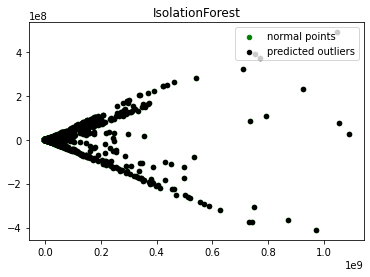

In [21]:
from sklearn.decomposition import PCA
pca = PCA(2)

pca.fit(features)
res = pd.DataFrame(pca.transform(features))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20, label="normal points")
b1 = plt.scatter(res.iloc[outliers, 0], res.iloc[outliers, 1],
                 c='black', s=20,  label="predicted outliers")
plt.legend(loc="upper right")
plt.show()


Получилось плохо

Cделаем отбор фичей с помощью ленейной модели с $L_1$ регуляризацией

In [22]:
class LinearModel:
    def __init__(self, alpha=1, tol=0.01):
        self.scaler = StandardScaler()
        self.lasso = Lasso(alpha=alpha, tol=tol)

    def fit(self, X, y):
        X = self.scaler.fit_transform(X)
        self.lasso.fit(X, y)

    def predict(self, X):
        X = self.scaler.transform(X)
        return self.lasso.predict(X)

    @property
    def coef(self):
        return self.lasso.coef_


In [23]:
model = LinearModel()
model.fit(df.drop(columns='pred'), df['pred'])

Фичи с нулевыми весами не влияют на модель. Поэтому их можно выкинуть 

In [24]:
features_to_drop = list(map(lambda x: x[0],filter(lambda x: x[1]==0,(zip(df.drop(columns=['pred']).columns, model.coef)))))
df = df.drop(columns=features_to_drop)

Применим решающие деревья для предсказания

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='pred'), df['pred'], test_size=0.3)


tree = DecisionTreeRegressor()
params = {'max_depth': range(4,10), 'min_samples_leaf': range(50, 1000, 100)}
model = GridSearchCV(tree, param_grid=params, scoring='neg_mean_squared_error',
                     n_jobs=4, return_train_score=True, refit=True)

model.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': range(4, 10),
                         'min_samples_leaf': range(50, 1000, 100)},
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
tree = model.best_estimator_
model.best_params_, model.best_score_

({'max_depth': 9, 'min_samples_leaf': 50}, -266096.095525844)

In [27]:
mean_squared_error(y_train, tree.predict(X_train))

251635.3759403199

In [28]:
mean_squared_error(y_test, tree.predict(X_test))

264780.690879305

Выделим весь код преобразования данных

In [29]:
class DataSet:
    def __init__(self, df, target='pred', missing_threshold=0.7, features_to_drop=None):
        if features_to_drop is None:
            features_to_drop = []

        self.y = df[target]

        df = df.drop(columns=target)

        x, y, z = convert_to_xyz(df['lat_10'], df['lon_10'])
        df['x'] = x
        df['y'] = y
        df['z'] = z
        df = df.drop(columns=['lat_10', 'lon_10'])

        df['geo_lat'] = df['geo_h3_10'].map(lambda g: h3.h3_to_geo(g)[0])
        df['geo_lon'] = df['geo_h3_10'].map(lambda g: h3.h3_to_geo(g)[1])
        x, y, z = convert_to_xyz(df['geo_lat'], df['geo_lon'])
        df['x_geo'] = x
        df['y_geo'] = y
        df['z_geo'] = z

        df = df.drop(columns=['geo_lat', 'geo_lon', 'geo_h3_10'])

        df['dt'] = pd.to_datetime(df['dt'], format='%Y%m%d')
        df['year'] = df['dt'].dt.year
        df['month'] = df['dt'].dt.month
        df['day'] = df['dt'].dt.day
        df = df.drop(columns='dt')

        missing = df.isnull().sum()
        missing = pd.DataFrame([missing]).T.reset_index().rename(
            columns={'index': 'feat', 0: 'missing'})
        missing['missing'] /= len(df)

        df.drop(columns=missing[missing['missing']
                > missing_threshold]['feat'].values)

        df = df.drop(columns=features_to_drop, errors='ignore')

        means = df.mean(numeric_only=True)
        df = df.fillna(means)

        self.X = df

    @staticmethod
    def convert_to_xyz(lat, lon):
        x = np.cos(lat)*np.cos(lon)
        y = np.cos(lat)*np.sin(lon)
        z = np.sin(lat)
        return x, y, z


Сохраним данные для kepler-gl

In [31]:
data = pd.read_csv(data_root/'train.csv')
pd.DataFrame({'lat':data['lat_10'], 'lon':data['lon_10'],'target':data['pred']}).to_csv('visualization.csv')

![image](kepler.gl.png)

![image](kepler.gl%20(1).png)